#Online Payments Fraud Detection









Connecting Google Colab to Kaggle to get Dataset directly to colab

In [ ]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

Downloading the helper functions designed by mrdbourke which contains custom functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

Installing pycaret library

In [ ]:
!pip install --pre pycaret

Installing model deployment library

In [ ]:
!pip install gradio

In [ ]:
!pip install -U dataprep

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Importing required functions from helper functions

In [20]:
from helper_functions import unzip_data

unziping the dataset

In [12]:
unzip_data('online-payment-fraud-detection.zip')

Importing required libraries

In [21]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("onlinefraud.csv")

In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


checking datatypes and size of dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Sampling the data

* As the dataset too large which consists around 6362620 entries, if we procced entire dataset at one go ,it will take lot of processing time.

* To solve this issue we going to take sample out of this dataset , i have taken 20% of data as sample, you can tune this sample size



In [17]:
df1 = df.sample(frac=0.2)

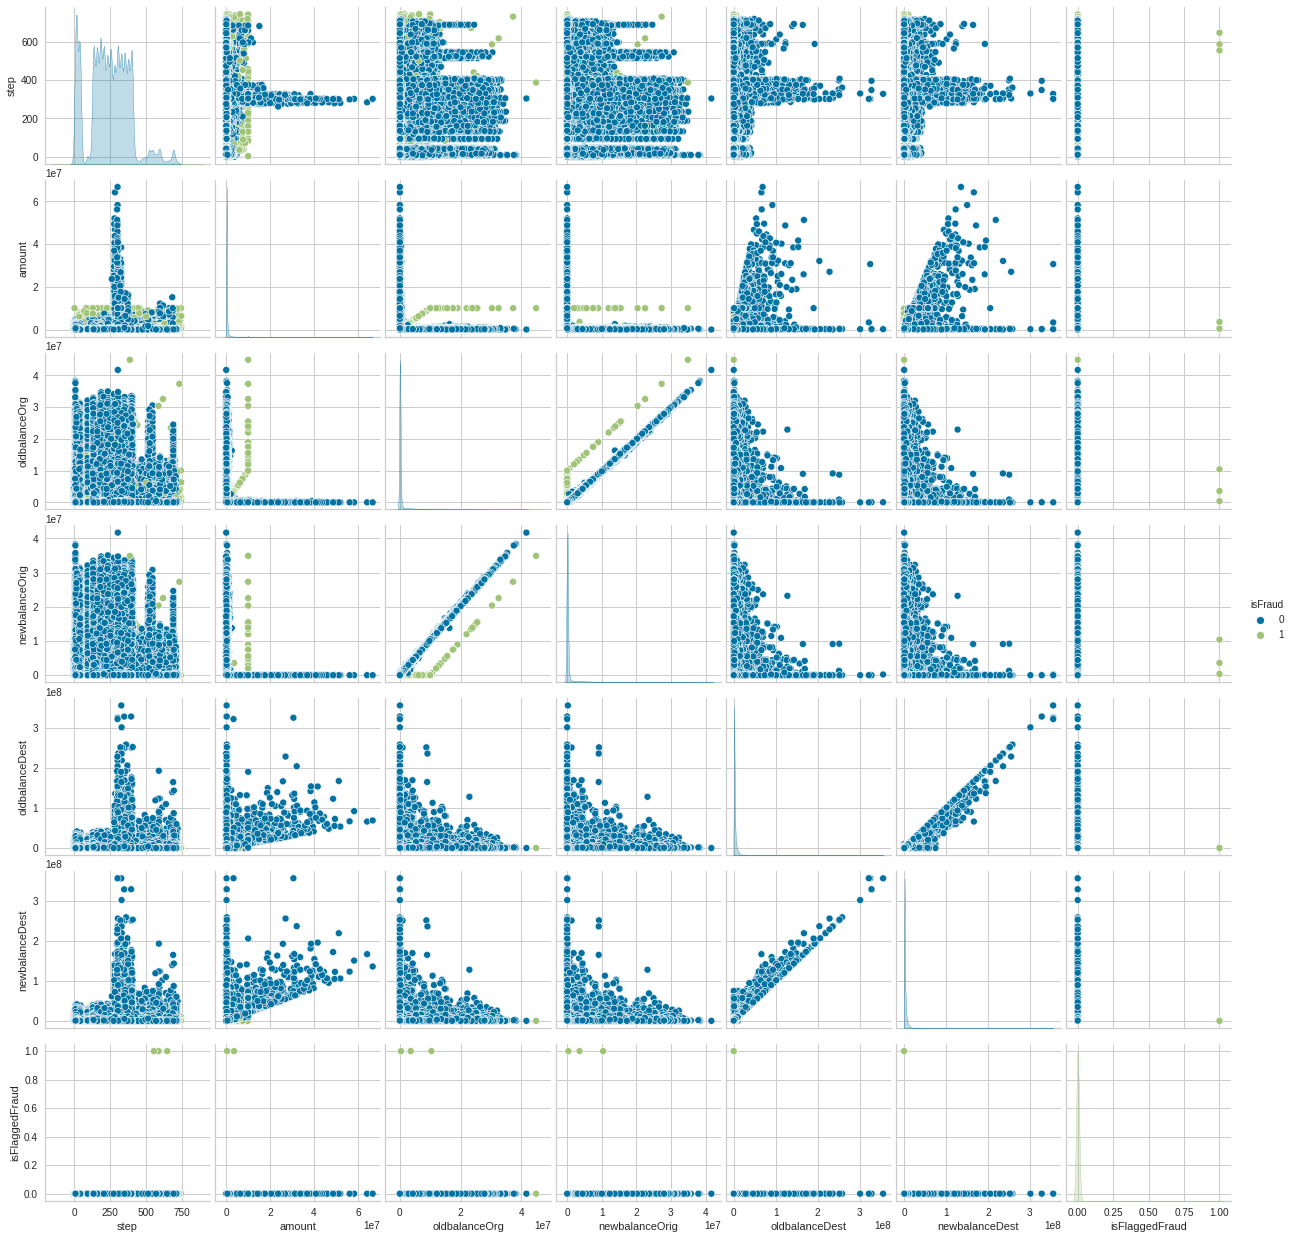

In [22]:
sns.pairplot(df1, hue='isFraud')

Dropping unnecessary columns 

In [ ]:
df1 = df1.drop(columns = ['nameOrig','nameDest','isFlaggedFraud'])

Over Sampling Method

* As the Target Variable i.e isFraud contains less no of companies goes isFraud i.e no of 1 is less as compared to 0. This is where we use oversampling method to make this two classes balanced.

In [ ]:
df1['isFraud'].value_counts()

0    1270913
1       1611
Name: isFraud, dtype: int64

#Model Building using Auto ML



> Pycaret AutoML Library

* PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.

* It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

* Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient.



Step 1 : Setting up preprocessing the data: 

* fix_balance : over sampling
* remove_outliers: outliers
* target : dependent variable

In [ ]:
clf1 = setup(data=df1, target='isFraud',fix_imbalance=True,remove_outliers=True,use_gpu=True)

,Description,Value
0,Session id,7869
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(1272524, 8)"
4,Transformed data shape,"(2077630, 12)"
5,Transformed train set shape,"(1695012, 12)"
6,Transformed test set shape,"(381758, 12)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


#Exploratory Data Analysis 

In [ ]:
rep = create_report(df1)
rep.save("EDA.html")

Report has been saved to EDA.html!


check which model perform best

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9990,0.9945,0.7917,0.5628,0.6574,0.6568,0.6667,93.7010
rf,Random Forest Classifier,0.9989,0.9964,0.7917,0.5571,0.6533,0.6528,0.6633,208.0240
dt,Decision Tree Classifier,0.9987,0.8856,0.7722,0.4814,0.5926,0.5920,0.6089,14.7290
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.6310
lightgbm,Light Gradient Boosting Machine,0.9954,0.9977,0.9575,0.2125,0.3476,0.3463,0.4498,16.7670
knn,K Neighbors Classifier,0.9927,0.9102,0.8112,0.1274,0.2202,0.2185,0.3197,19.6310
gbc,Gradient Boosting Classifier,0.9815,0.9933,0.9708,0.0626,0.1175,0.1154,0.2440,342.3850
svm,SVM - Linear Kernel,0.9717,0.0000,0.9451,0.0412,0.0790,0.0767,0.1939,89.2840
ada,Ada Boost Classifier,0.9673,0.9884,0.9681,0.0364,0.0701,0.0678,0.1842,92.7850
lr,Logistic Regression,0.9641,0.9783,0.9716,0.0337,0.0651,0.0628,0.1771,74.4630


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Logistic Regression has performed really well, so im going to use this model for deployment

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9989,0.9896,0.8319,0.5562,0.6667,0.6662,0.6797
1,0.9988,0.9934,0.7611,0.5150,0.6143,0.6137,0.6255
2,0.9989,0.9891,0.8142,0.5476,0.6548,0.6543,0.6672
3,0.9990,0.9988,0.8053,0.5909,0.6816,0.6812,0.6894
4,0.9990,0.9980,0.7699,0.5649,0.6517,0.6512,0.6590
5,0.9990,0.9943,0.7434,0.5793,0.6512,0.6507,0.6557
6,0.9989,0.9894,0.7679,0.5513,0.6418,0.6413,0.6501
7,0.9990,0.9993,0.8661,0.5706,0.6879,0.6875,0.7025
8,0.9991,0.9994,0.7965,0.6250,0.7004,0.7000,0.7051


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9990,0.9943,0.7681,0.5725,0.6561,0.6556,0.6627


,step,type_CASH_OUT,type_PAYMENT,type_CASH_IN,type_TRANSFER,type_DEBIT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,prediction_label,prediction_score
890766,259.0,1.0,0.0,0.0,0.0,0.0,124542.101562,0.000000,0.00000,1.464258e+06,1.656980e+06,0,0,1.00
890767,41.0,0.0,0.0,1.0,0.0,0.0,83887.093750,605155.812500,689042.87500,5.269539e+05,4.430668e+05,0,0,1.00
890768,236.0,1.0,0.0,0.0,0.0,0.0,115140.609375,9922.000000,0.00000,2.817763e+05,3.969169e+05,0,0,1.00
890769,428.0,0.0,1.0,0.0,0.0,0.0,9637.040039,0.000000,0.00000,0.000000e+00,0.000000e+00,0,0,1.00
890770,215.0,0.0,0.0,0.0,1.0,0.0,702024.750000,50122.000000,0.00000,6.699871e+05,1.372012e+06,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272519,573.0,0.0,1.0,0.0,0.0,0.0,3660.110107,89068.578125,85408.46875,0.000000e+00,0.000000e+00,0,0,1.00
1272520,40.0,1.0,0.0,0.0,0.0,0.0,107675.882812,10811.000000,0.00000,5.780000e+02,1.060969e+05,0,0,0.95
1272521,422.0,0.0,1.0,0.0,0.0,0.0,43653.039062,0.000000,0.00000,0.000000e+00,0.000000e+00,0,0,1.00
1272522,356.0,1.0,0.0,0.0,0.0,0.0,363220.437500,0.000000,0.00000,4.972458e+05,8.604662e+05,0,0,1.00


In [ ]:
save_model(et,'best model fraud detection')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['step', 'amount', 'oldbalanceOrg',
                                              'newbalanceOrig', 'oldbalanceDest',
                                              'newbalanceDest'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_imputer',
                  Transform...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
              

In [ ]:
loaded_model = load_model("best model fraud detection")

Transformation Pipeline and Model Successfully Loaded


Running app for actual prediction

In [ ]:
create_app(loaded_model)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>